In [182]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("salaries_clean.csv")

In [183]:
df.head()

,salary_id,employer_name,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,stock_value_bonus,comments,submitted_at
0,1,opower,"san francisco, ca",CA,US,37.77,-122.41,systems engineer,Engineering,NaN,13.0,2.0,125000.0,5000.0,0.0,5000 shares,Don't work here.,3/21/16 12:58
1,3,walmart,"bentonville, ar",AR,US,36.36,-94.20,senior developer,Software,Senior,15.0,8.0,65000.0,NaN,5000.0,"3,000",NaN,3/21/16 12:58
2,4,vertical knowledge,"cleveland, oh",OH,US,41.47,-81.67,software engineer,Software,NaN,4.0,1.0,86000.0,5000.0,6000.0,0,NaN,3/21/16 12:59
3,6,netapp,waltham,NaN,NaN,NaN,NaN,mts,Other,NaN,4.0,0.0,105000.0,5000.0,8500.0,0,NaN,3/21/16 13:00
4,12,apple,santa clara,NaN,NaN,NaN,NaN,software engineer,Software,NaN,4.0,3.0,110000.0,5000.0,7000.0,150000,NaN,3/21/16 13:02


In [184]:
df = df[["location_name", "total_experience_years", "annual_base_pay"]]

In [185]:
df = df[df["annual_base_pay"].notnull()]

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 0 to 1643
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location_name           1640 non-null   object 
 1   total_experience_years  1596 non-null   float64
 2   annual_base_pay         1640 non-null   float64
dtypes: float64(2), object(1)
memory usage: 51.2+ KB


In [187]:
df.head()

,location_name,total_experience_years,annual_base_pay
0,"san francisco, ca",13.0,125000.0
1,"bentonville, ar",15.0,65000.0
2,"cleveland, oh",4.0,86000.0
3,waltham,4.0,105000.0
4,santa clara,4.0,110000.0


In [188]:
df = df[df['total_experience_years'].notnull()]

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 1643
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location_name           1596 non-null   object 
 1   total_experience_years  1596 non-null   float64
 2   annual_base_pay         1596 non-null   float64
dtypes: float64(2), object(1)
memory usage: 49.9+ KB


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 1643
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location_name           1596 non-null   object 
 1   total_experience_years  1596 non-null   float64
 2   annual_base_pay         1596 non-null   float64
dtypes: float64(2), object(1)
memory usage: 49.9+ KB


In [191]:
df['location_name'].value_counts()

san francisco                                   149
int                                              87
santa clara                                      80
new york                                         79
seattle                                          59
US                                               58
london                                           30
canada                                           27
san francisco, ca                                25
santa clara, ca                                  22
seattle, wa                                      22
chicago                                          18
redmond, wa                                      18
los angeles                                      18
boston, ma                                       17
menlo park                                       17
austin, tx                                       16
boston                                           15
redmond                                          14
US, co      

In [192]:
def cleanlocation(categories):
    cat_map = {}
    for i in range(len(categories)):
        if (categories.index[i].find(",") != -1):
            cat_map[categories.index[i]] = categories.index[i].split(",", 1)[0]
        else:
            cat_map[categories.index[i]] = categories.index[i]
    return cat_map

In [193]:
citymap = cleanlocation(df.location_name.value_counts())

In [194]:
df['location_name'] = df['location_name'].map(citymap)
df.location_name.value_counts()

san francisco                  174
US                             124
int                            107
santa clara                    105
new york                        94
seattle                         83
canada                          38
london                          37
redmond                         34
boston                          33
austin                          29
los angeles                     25
chicago                         25
menlo park                      20
remote                          12
baltimore                        7
1                                6
stockholm                        6
paris                            6
madison                          6
melbourne                        6
pune                             6
australia                        4
pleasanton                       4
washington                       4
poland                           4
nj                               4
raleigh                          4
los gatos           

In [195]:
def clean_small(categories):
    cat_map = {}
    for i in range(len(categories)):
        if (categories.values[i] >= 20):
            cat_map[categories.index[i]] = categories.index[i]
        else:
            cat_map[categories.index[i]] = 'Other'
    return cat_map

In [196]:
countmap = clean_small(df.location_name.value_counts())

In [197]:
df['location_name'] = df['location_name'].map(countmap)
df.location_name.value_counts()

Other            668
san francisco    174
US               124
int              107
santa clara      105
new york          94
seattle           83
canada            38
london            37
redmond           34
boston            33
austin            29
chicago           25
los angeles       25
menlo park        20
Name: location_name, dtype: int64

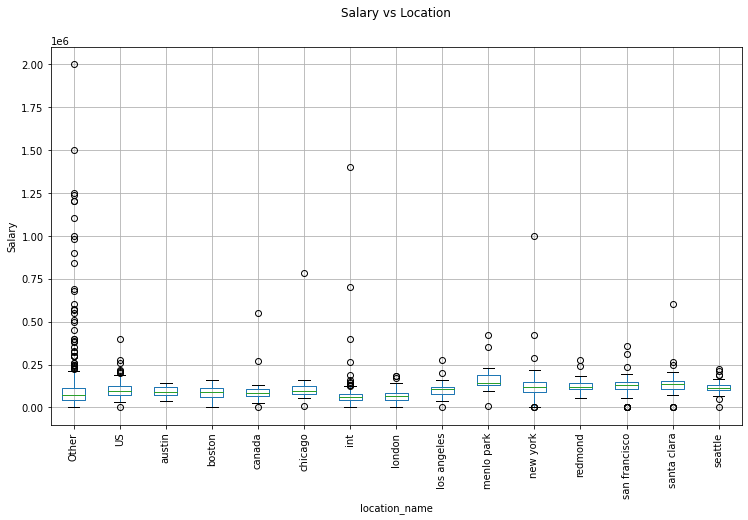

In [202]:
df = df[df['annual_base_pay'] <= 2000000]

fig, ax = plt.subplots(1,1,figsize = (12,7))
df.boxplot('annual_base_pay', 'location_name',ax = ax)
plt.suptitle('Salary vs Location')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [203]:
df['total_experience_years'].unique()

array([13.  , 15.  ,  4.  ,  5.  ,  8.  ,  2.  ,  1.  , 10.  , 19.  ,
        0.  ,  6.  ,  2.5 , 40.  , 20.  , 18.  ,  9.  , 12.  ,  1.5 ,
        3.  , 11.  ,  7.  , 14.  , 17.  , 16.  ,  2.75, 23.  ,  3.5 ,
       55.  , 21.  ,  9.75, 35.  ,  8.5 , 26.  , 22.  , 30.  ,  0.5 ,
        0.9 ,  6.5 ,  1.33, 25.  ,  4.5 , 32.  ,  0.75,  5.5 ,  1.6 ,
        3.75, 56.  , 36.  ])

In [204]:
 def clean_exp(x):
        return float(x)
df['total_experience_years'] = df['total_experience_years'].apply(clean_exp)

In [205]:
df['total_experience_years'].unique()

array([13.  , 15.  ,  4.  ,  5.  ,  8.  ,  2.  ,  1.  , 10.  , 19.  ,
        0.  ,  6.  ,  2.5 , 40.  , 20.  , 18.  ,  9.  , 12.  ,  1.5 ,
        3.  , 11.  ,  7.  , 14.  , 17.  , 16.  ,  2.75, 23.  ,  3.5 ,
       55.  , 21.  ,  9.75, 35.  ,  8.5 , 26.  , 22.  , 30.  ,  0.5 ,
        0.9 ,  6.5 ,  1.33, 25.  ,  4.5 , 32.  ,  0.75,  5.5 ,  1.6 ,
        3.75, 56.  , 36.  ])

In [206]:
from sklearn.preprocessing import LabelEncoder
le_location = LabelEncoder()
df['location_name'] = le_location.fit_transform(df['location_name'])
df['location_name'].unique()

array([12,  0, 13, 10,  1,  5, 14,  4,  6,  2,  3, 11,  7,  9,  8])

In [208]:
x = df.drop("annual_base_pay", axis = 1)
y = df["annual_base_pay"]

In [209]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x, y.values)

LinearRegression()

In [210]:
y_pred = linear_reg.predict(x)

In [211]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y,y_pred))

In [212]:
error


123782.11995694584

In [213]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state = 0)
dec_tree.fit(x, y.values)

DecisionTreeRegressor(random_state=0)

In [216]:
y_pred = dec_tree.predict(x)

In [217]:
error = np.sqrt(mean_squared_error(y, y_pred))
error

117500.03566001118

In [218]:
x

,location_name,total_experience_years
0,12,13.00
1,0,15.00
2,0,4.00
3,0,4.00
4,13,4.00
5,0,5.00
6,0,4.00
7,10,8.00
8,10,2.00
9,12,1.00


In [314]:
test = np.array([["san francisco", 8]])

In [315]:
test

array([['san francisco', '8']], dtype='<U13')

In [316]:
test[:,0] = le_location.transform(test[:,0])

In [317]:
test = test.astype(float)

In [318]:
test

array([[12.,  8.]])

In [319]:
y_pred = dec_tree.predict(test)
y_pred

C:\Users\tongh\Desktop\Everything\Code\MLWebApp\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([124375.])

In [320]:
import pickle

In [326]:
data = {"linear" : linear_reg, "decision": dec_tree, "le_location" : le_location}
with open ('saved_model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [327]:
with open ('saved_model.pkl', 'rb') as file:
    data = pickle.load(file)

In [330]:
decision_loaded = data["decision"]
le_location = data["le_location"]


In [331]:
new_pred = decision_loaded.predict(test)
new_pred

C:\Users\tongh\Desktop\Everything\Code\MLWebApp\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([124375.])